<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd#импорт библиотеки pandas
import warnings
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
FORMAT='%Y-%m-%d'

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [182]:
df.info()#получение информации о данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18320 entries, 0 to 23696
Data columns (total 29 columns):
total_images              18320 non-null int64
last_price                18320 non-null float64
total_area                18320 non-null float64
first_day_exposition      18320 non-null datetime64[ns]
rooms                     18320 non-null int64
ceiling_height            18320 non-null float64
floors_total              18320 non-null int64
living_area               18320 non-null float64
floor                     18320 non-null int64
is_apartment              18320 non-null object
studio                    18320 non-null bool
open_plan                 18320 non-null bool
kitchen_area              18320 non-null float64
balcony                   18320 non-null int64
locality_name             18320 non-null object
airports_nearest          18320 non-null float64
cityCenters_nearest       18320 non-null float64
parks_around3000          13580 non-null float64
parks_nearest       

В таблице 22 столбца. Типы данных во всех столбцах разные - float, int, object, bool.


**Согласно документации к данным** :

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


### Вывод

Данные в таблице описывают характеристики недвижимости. Встречаются множество пропущенных значений,ошибки в распознавании типов данных.
Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

In [48]:
df.isna().sum()#количество пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы видим, что пропусков достаточно много. Займемся их обработкой.

In [49]:
df[df['is_apartment'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Удалим строки с пустым значением locality_name, так как они могут нам помешать с дальнейшими расчетами.

In [50]:
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

Дату публикации переведем в нужный нам формат:

In [1]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format=FORMAT)

NameError: name 'pd' is not defined

Можно предположить, что в столбце days_exposition пропуски обозначают,что объявление еще действующее. Значит,для заполнения нам нужно вычесть из первого дня публикации - сегодняшнюю. Также заменим тип данных на int:

In [52]:
print('Пропусков до:', df['days_exposition'].isna().sum())
df.loc[df['days_exposition'].isna(), 'days_exposition'] = (df['first_day_exposition'].max() - df.loc[df['days_exposition'].isna(), 'first_day_exposition']).dt.days
print('Пропусков после:', df['days_exposition'].isna().sum())
#заменяем тип данных
df['days_exposition'] = df['days_exposition'].astype('int')

Пропусков до: 3180
Пропусков после: 0


Высоту потолков заполним с помощью группировки по переменной locality_name:

In [53]:
print('Пропуски до:', df['ceiling_height'].isna().sum())
#заполняем пропуски с помощью loc
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == locality_name), 'ceiling_height'] = median
   
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()#все,что не заполнилось,заполняем общей медианой

print('Пропуски после:', df['ceiling_height'].isna().sum())   

Пропуски до: 9160
Пропуски после: 0


Кол-во этажей , удаленность от аэропорта, центра, а также пруды и парки рядом заполняем аналогично:

In [54]:
print('Пропуски до:', df['floors_total'].isna().sum())

for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'floors_total'].median()
    df.loc[(df['floors_total'].isna()) & (df['locality_name'] == locality_name), 'floors_total'] = median
   
print('Пропуски после:', df['floors_total'].isna().sum())

Пропуски до: 85
Пропуски после: 0


Заменим тип данных на int:

In [55]:
df['floors_total'] = df['floors_total'].astype('int')

In [56]:
print('Пропуски до:', df['airports_nearest'].isna().sum())

for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'airports_nearest'].median()
    df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == locality_name), 'airports_nearest'] = median
   
df.loc[df['airports_nearest'].isna(), 'airports_nearest'] = df['airports_nearest'].median()

print('Пропуски после:', df['airports_nearest'].isna().sum())

Пропуски до: 5534
Пропуски после: 0


In [57]:
print('Пропуски до:', df['cityCenters_nearest'].isna().sum())

for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == locality_name), 'cityCenters_nearest'] = median
   
df.loc[df['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = df['cityCenters_nearest'].median()

print('Пропуски после:', df['cityCenters_nearest'].isna().sum())

Пропуски до: 5511
Пропуски после: 0


In [58]:
print('Пропуски до:', df['parks_nearest'].isna().sum())

for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'parks_nearest'].median()
    df.loc[(df['parks_nearest'].isna()) & (df['locality_name'] == locality_name), 'parks_nearest'] = median
   
df.loc[df['parks_nearest'].isna(), 'parks_nearest'] = df['parks_nearest'].median()

print('Пропуски после:', df['parks_nearest'].isna().sum())

Пропуски до: 15586
Пропуски после: 0


In [59]:
print('Пропуски до:', df['ponds_nearest'].isna().sum())

for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'ponds_nearest'].median()
    df.loc[(df['ponds_nearest'].isna()) & (df['locality_name'] == locality_name), 'ponds_nearest'] = median
   
df.loc[df['ponds_nearest'].isna(), 'ponds_nearest'] = df['ponds_nearest'].median()

print('Пропуски после:', df['ponds_nearest'].isna().sum())

Пропуски до: 14565
Пропуски после: 0


Жилую площадь и площадь кухни мы заполним с помощью группировки, но уже по переменной rooms(так как это напрямую зависит от кол-во комнат):

In [60]:
print('Пропуски до:', df['living_area'].isna().sum())

for rooms in df['rooms'].unique():
    median = df.loc[df['rooms'] == rooms, 'living_area'].median()
    df.loc[(df['living_area'].isna()) & (df['rooms'] == rooms), 'living_area'] = median
   
df.loc[df['living_area'].isna(), 'living_area'] = df['living_area'].median()

print('Пропуски после:', df['living_area'].isna().sum())

Пропуски до: 1898
Пропуски после: 0


In [61]:
print('Пропуски до:', df['kitchen_area'].isna().sum())

for rooms in df['rooms'].unique():
    median = df.loc[df['rooms'] == rooms, 'kitchen_area'].median()
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == rooms), 'kitchen_area'] = median
   
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['kitchen_area'].median()

print('Пропуски после:', df['kitchen_area'].isna().sum())

Пропуски до: 2269
Пропуски после: 0


Наличие балкона при продажа существенный плюс,поэтому при заполнении объявления продавец в любом случае заполнит этот пункт. Значит,можно предположить,что пропуск в данном случае обозначает отсутствие балкона. С помощью fillna заменим пропуски на 0. И заменим тип данных на int.

In [62]:
print('Пропуски до:', df['balcony'].isna().sum())
df['balcony'] = df['balcony'].fillna(0)
print('Пропуски после:', df['balcony'].isna().sum())
df['balcony'] = df['balcony'].astype('int')

Пропуски до: 11513
Пропуски после: 0


Пункт "апартаменты" не менее важен. Его также обязательно будут заполнять,так как в данном типе недвижимости нельзя прописаться. Соответственно заполним пропуски на 'False'.

In [63]:
df['is_apartment'] = df['is_apartment'].fillna('False')
df['is_apartment']

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23650, dtype: object

Убедимся,что больше нет пропусков. Для этого еще раз проверим количество пропущенных значений.

In [64]:
df.info()#количество пропущенных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           23650 non-null float64
ponds_aro

Мы видим,что пропуски заполнены везде, где это необходимо. Я считаю,что пропуски в столбцах parks_around3000 и  ponds_around3000 заполнять не требуется, так как в решениях наших задач эти данные не потребуются.

In [65]:
df.duplicated().sum()#проверка дубликатов

0

### Вывод
Мы завершили работу над заполнением пропусков.

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

Считаем цену квадратного метра и для удобства приведем к типу int:

In [66]:
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).astype('int')
df['price_per_square_meter']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_square_meter, Length: 23650, dtype: int64

С помощью DatetimeIndex добавляем столбцы с днем недели,месяцем и годом публикации объявления:

In [67]:
df['day_exp'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month_exp'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exp'] = pd.DatetimeIndex(df['first_day_exposition']).year
display(df[['day_exp', 'month_exp', 'year_exp']])

,day_exp,month_exp,year_exp
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018
...,...,...,...
23694,1,3,2017
23695,0,1,2018
23696,6,2,2018
23697,1,3,2017


Напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1

In [68]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
df['floor_group'] = df.apply(floor_group, axis=1)
display(df['floor_group'].value_counts())

другой       17403
последний     3335
первый        2912
Name: floor_group, dtype: int64

Добавим столбец соотношения жилой плозади к общей, а также отношение площади кухни к общей.

In [69]:
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']
display(df[['living_area_ratio','kitchen_area_ratio']])

,living_area_ratio,kitchen_area_ratio
0,0.472222,0.231481
1,0.460396,0.272277
2,0.612500,0.148214
3,0.283019,0.059748
4,0.320000,0.410000
...,...,...
23694,0.547792,0.103356
23695,0.644068,0.144068
23696,0.523810,0.155203
23697,0.397394,0.303583


Проверим на наличие дубликатов.

In [70]:
df.duplicated().sum()

0

## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Напишем функции для построения графиков:

In [92]:
#построение гистограммы
def draw_hist(col, xmin, xmax, title, xlab, ylab):
    df.hist(col, bins=50, range=(xmin,xmax), grid=True)
    plt.title(title, size=14)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    
    
#построение диаграммы размаха
def draw_boxplot(col, ymin, ymax, title):
    df.boxplot(column=col)
    plt.ylim(ymin, ymax)
    plt.title(title, size=14)

Построим гистограмму для площади:

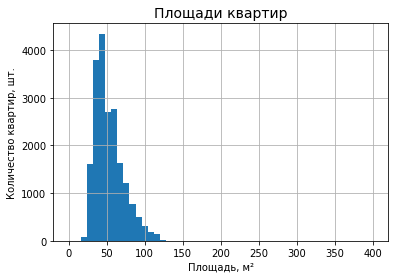

In [93]:
draw_hist('total_area', 0, 400, 'Площади квартир', 'Площадь, м²', 'Количество квартир, шт.')

Гистограмма выглядит правдоподобно, большинство квартир имеют площадь от 25 до 60 кв.метров, пик значений около 45 кв.м., а после 100 частота стремительно уменьшается. Построим диаграмму размаха:

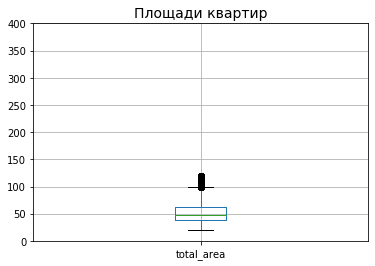

In [94]:
draw_boxplot('total_area', 0, 400, 'Площади квартир')

Распределение нормальных значений от 20 до до 120 квадратных метров. Избавимся от выбивающихся значений:

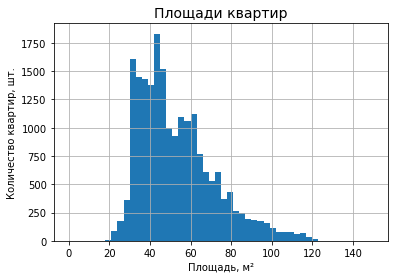

In [95]:
df = df.query('total_area > 20 and total_area <= 120')
draw_hist('total_area', 0, 150, 'Площади квартир', 'Площадь, м²', 'Количество квартир, шт.')

Построим гистограмму для цены:

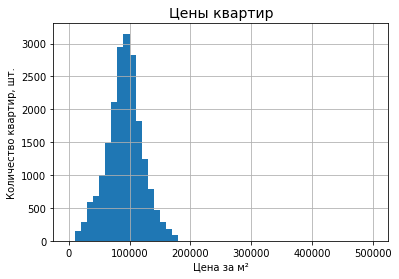

In [103]:
draw_hist('price_per_square_meter', 0, 500000, 'Цены квартир', 'Цена за м²', 'Количество квартир, шт.')

Мы наблюдаем, что пик цены за квадратный метр около 90 тыс.руб, что похоже на правду, так как большинство данных в таблице по Петербургу. После 200000 частота стремительно уменьшается. Строим диаграмму размаха:

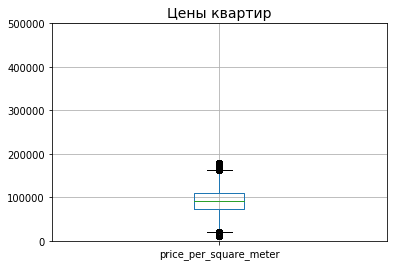

In [104]:
draw_boxplot('price_per_square_meter', 0, 500000, 'Цены квартир')

Распределение нормальных значений от 10 до 180 тыс.руб. Избавимся от выбросов:

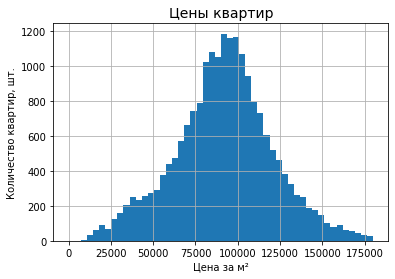

In [105]:
df = df.query('price_per_square_meter >= 10000 and price_per_square_meter <= 180000')
draw_hist('price_per_square_meter', 0, 180000, 'Цены квартир', 'Цена за м²', 'Количество квартир, шт.')

Гистограмма для кол-ва комнат:

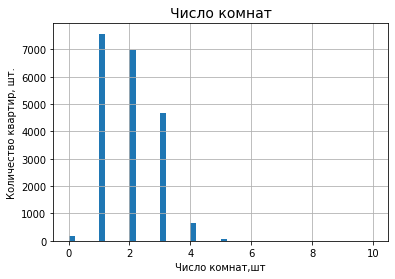

In [107]:
draw_hist('rooms', 0, 10, 'Число комнат', 'Число комнат,шт', 'Количество квартир, шт.')

Больше всего встречаются однокомнатные и двухкомнатные квартиры. Предполагаю,что 0 в данном случае студия. Построим диаграмму размаха:

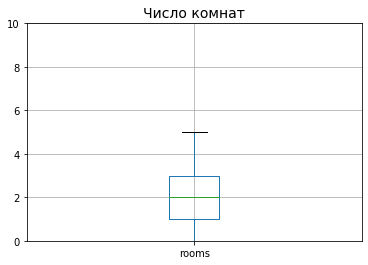

In [108]:
draw_boxplot('rooms', 0, 10,'Число комнат')

Избавимся от выбросов:

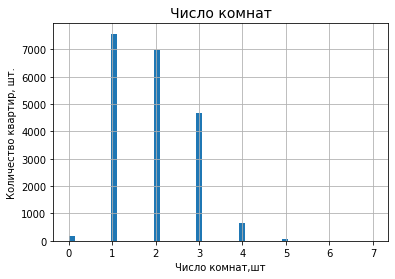

In [109]:
df = df.query('rooms < 6')
draw_hist('rooms', 0, 7, 'Число комнат', 'Число комнат,шт', 'Количество квартир, шт.')

Гистограмма для высоты потолков:

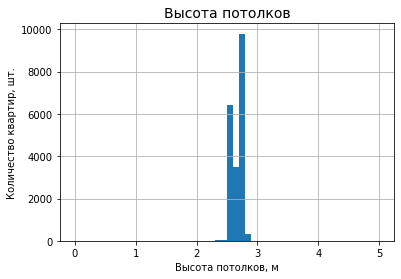

In [110]:
draw_hist('ceiling_height', 0, 5, 'Высота потолков', 'Высота потолков, м', 'Количество квартир, шт.')

Наиболее часто встречаются потолки высотой примерно 2.8 м. Построим диаграмму размаха, чтобы рассмотреть детальнее:

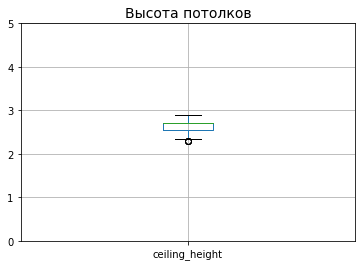

In [111]:
draw_boxplot('ceiling_height', 0, 5, 'Высота потолков')

Видим,что нормальные значения расположены примерно от 2.3 м до 2.9 метров,все остальное редкие и выбивающиеся значения. Избавимся от них.

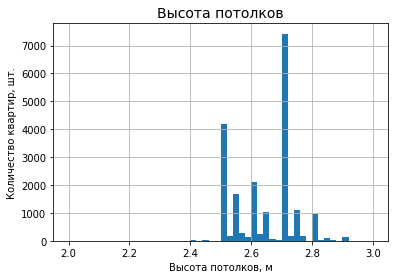

In [112]:
df = df.query('ceiling_height >= 2.3 and ceiling_height <= 2.9')
draw_hist('ceiling_height', 2, 3, 'Высота потолков', 'Высота потолков, м', 'Количество квартир, шт.')

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Построим гистограмму времени продажи квартиры:

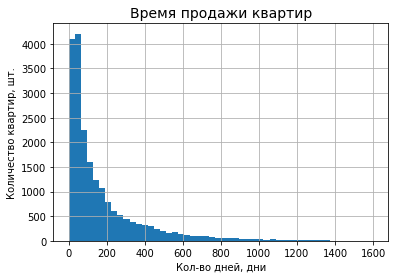

In [113]:
draw_hist('days_exposition', 0, 1600, 'Время продажи квартир', 'Кол-во дней, дни', 'Количество квартир, шт.')

Мы видим, что пик значений практически около нуля, после 400 дней значения похожи на выбросы. Также хвост сильно смещен вправо - значит медиана и среднее будут сильно отличаться. Медиана будет позывать наиболее верные выводы. Построим гистограмму с меньшими значениями,что постмотреть детальнее:

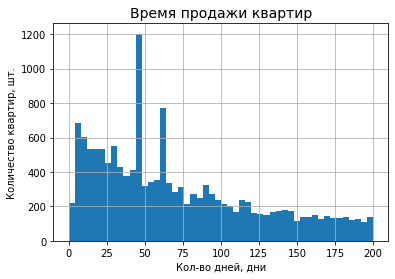

In [114]:
draw_hist('days_exposition', 0, 200, 'Время продажи квартир', 'Кол-во дней, дни', 'Количество квартир, шт.')

Видим,что пик значений около 45 дней. Построим диграмму размаха и посмотрим на медиану и среднее:


Можно предположить,что пики находятся на середине и конце месяца. В это время совершается больше сделок, за счет выплаты зарплат, оформления ипотек и пр.

Построим диаграмму размаха и также посмотрим на описательные статистики:

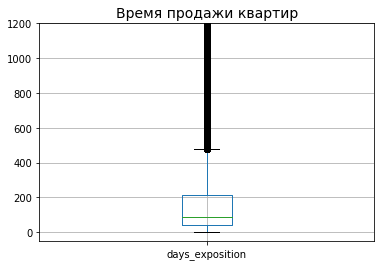

In [116]:
draw_boxplot('days_exposition', -50, 1200, 'Время продажи квартир')

In [117]:
df['days_exposition'].describe()

count    20105.000000
mean       171.663517
std        215.882253
min          0.000000
25%         41.000000
50%         89.000000
75%        216.000000
max       1618.000000
Name: days_exposition, dtype: float64

Действительно, среднее гораздо больше медианы,мы уже выяснили почему. Медиана 41-это и будет верхняя граница быстрой продажи. Чтобы понять,какие продажи длились необычно долго посмотрим на третий квартиль. Более 216 дней наша продажа будет считаться долгой. Также, удаляем выбросы:

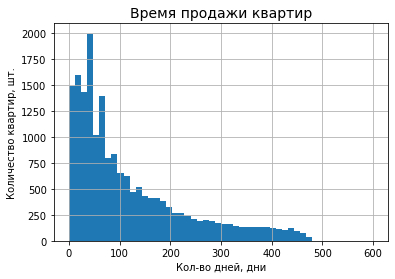

In [119]:
df = df.query('days_exposition>0 and days_exposition<=470')
draw_hist('days_exposition', 0, 600, 'Время продажи квартир', 'Кол-во дней, дни', 'Количество квартир, шт.')

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра.  

Напишем функцию для построения диаграммы рассеивания.

In [120]:
def draw_plot(x, y, title, xlab, ylab):
    df.plot(x, y, kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
    plt.title(title, size=14)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

Посмотрим на зависимость цены от площади,числа комнат и удаленности от центра. Построим диаграммы рассеивания:

0.011118866477600466

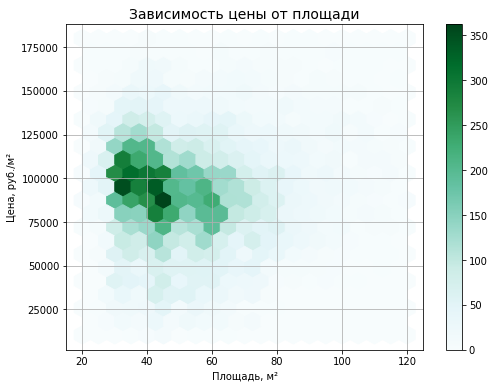

In [125]:
draw_plot('total_area', 'price_per_square_meter', 'Зависимость цены от площади', 'Площадь, м²', 'Цена, руб./м²')
df['total_area'].corr(df['price_per_square_meter'])

Коэффициент корреляции положителен, но очень мал. Можно сделать вывод, что зависимость есть,но небольшая.

-0.18358272833223893

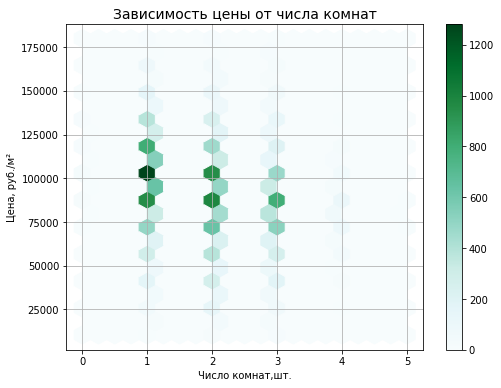

In [126]:
draw_plot('rooms', 'price_per_square_meter', 'Зависимость цены от числа комнат', 'Число комнат,шт.', 'Цена, руб./м²')
df['rooms'].corr(df['price_per_square_meter'])

В данном случае корреляция отрицательна,значит с увеличением числа комнат цена за квадратный метр снижается. Это же мы видим и на графике. 

-0.18395010730753472

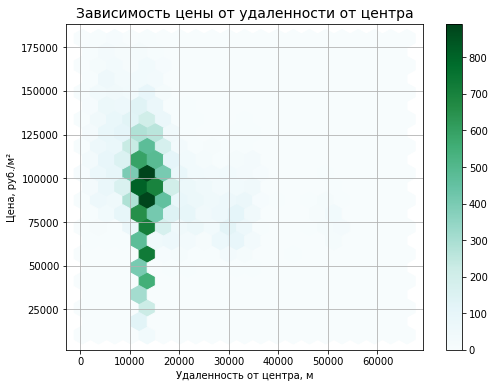

In [127]:
draw_plot('cityCenters_nearest', 'price_per_square_meter', 'Зависимость цены от удаленности от центра', 'Удаленность от центра, м', 'Цена, руб./м²')
df['cityCenters_nearest'].corr(df['price_per_square_meter'])

Аналогичная ситуация и с удаленностью от центра. При увеличении растояния от центра стоимость за квадратный метр снижается.

 Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
 Для этого построим диаграммы размаха.Также изучите зависимость от даты размещения: дня недели, месяца и года.

(1, 250000)

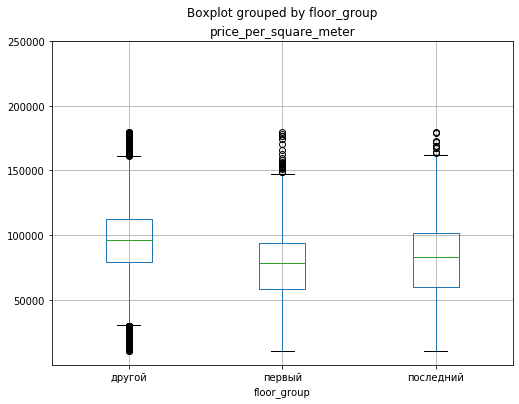

In [109]:
df.boxplot(column='price_per_square_meter', by='floor_group', figsize=(8,6))
plt.ylim(1, 250000)

Из графика видно,что медиана цены за квадратный метр первого этажа меньше остальных,но и на последнем этаже медиана не сильно больше. Можно сделать вывод,что квартиры на первом и последнем этажах дешевле остальных,что впринципе логично.

Напишем функцию для построения графиков зависимости от даты размещения:

In [128]:
def draw_plot1(tab, title, xlab, ylab):
    tab.plot(y='median')
    plt.title(title, size=14)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

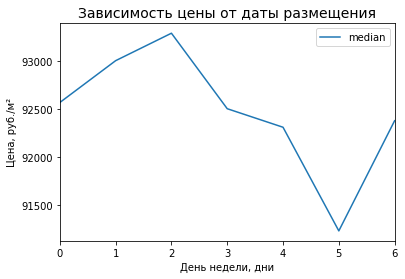

In [129]:
pivot_table_day_exp = df.pivot_table(index='day_exp', values='price_per_square_meter', aggfunc='median')
pivot_table_day_exp.columns=['median']
draw_plot1(pivot_table_day_exp, 'Зависимость цены от даты размещения', 'День недели, дни', 'Цена, руб./м²')

Исходя из графика, можно сказать, что самая высокая цена у объявлений,выложенных в среду. В субботу же самая низкая цена. Возможно, это связанно с тем,что большинство людей,выкладывающих объявления, в будние дни работают. В субботу же выкладывается огромная часть объявлений и цена за квадратный метр падает.

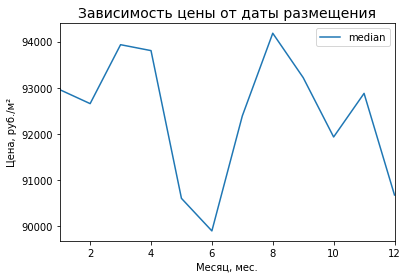

In [130]:
pivot_table_month_exp = df.pivot_table(index='month_exp', values='price_per_square_meter', aggfunc='median')
pivot_table_month_exp.columns=['median']
draw_plot1(pivot_table_month_exp,'Зависимость цены от даты размещения', 'Месяц, мес.', 'Цена, руб./м²')

В данном случае, можно сделать вывод о сезонности на рынке недвижимости. Мы видим,что обвалы на графике соответсвуют месяцам:май-июнь,конец ноября-декабрь. Действительно,это период майских праздников и Нового года. В это время праздники и много трат,поэтому глобальные покупки откладываются. Значит,предложение превышает спрос и цены снижают для привлечения покупателей. Апрель, август и начало сентября-пиковые значения на графике. Это также логично. Осень-начинается учебный год у детей, можно поменять школы,сады и пр. Люди возвращаются из отпусков и готовы к крупным тратам. Соответсвенно,спрос превышает предложение и покупатели могут ставить цену выше.

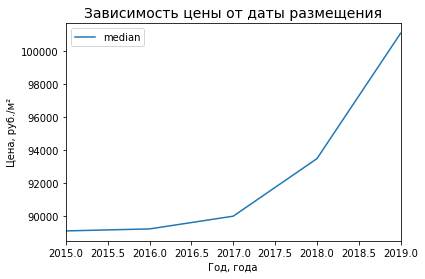

In [131]:
pivot_table_year_exp = df.pivot_table(index='year_exp', values='price_per_square_meter', aggfunc='median')
pivot_table_year_exp.columns=['median']
draw_plot1(pivot_table_year_exp, 'Зависимость цены от даты размещения', 'Год, года', 'Цена, руб./м²')

С каждым годом растет цена за квадратный метр. Это логично,факторов множество.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [159]:
top_exp = df.loc[:, ['locality_name', 'price_per_square_meter']]
top_exp = df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count','mean'])
top_exp.columns = ['Число объявлений', 'Средняя цена за м²']
top_exp.sort_values(by='Число объявлений', ascending=False).head(10)

,Число объявлений,Средняя цена за м²
locality_name,,
Санкт-Петербург,11522,105363.244055
посёлок Мурино,478,86004.094142
посёлок Шушары,408,78525.475490
Всеволожск,334,66830.092814
посёлок Парголово,306,89906.372549
Колпино,296,75482.152027
Пушкин,274,100838.350365
деревня Кудрово,262,92745.641221
Гатчина,257,68441.536965


Мы посчитали среднюю цену в 10 населенных пунктах с наибольшим числом объявлений и отсортировали их по убыванию. 


***В Санкт-Петербурге и Пушкине самая высокая цена за квадратный метр, а в Выбоге-самая низкая***

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [161]:
spb_flats = df.query('locality_name == "Санкт-Петербург"')#срез данных,где населенный пункт-Санкт-Петербург
spb_flats_price = spb_flats.loc[:, ['locality_name', 'cityCenters_nearest', 'price_per_square_meter']]#таблица spb_flats_price с необходимыми данными
spb_flats_price['cityCenters_km'] = (spb_flats_price['cityCenters_nearest'] / 1000).round().astype('int')#столбец с расстоянием до центра в км
spb_flats_price_pivot = spb_flats_price.pivot_table(index='cityCenters_km', values='price_per_square_meter', aggfunc=('mean'))#средняя цена для км
spb_flats_price_pivot.head()

,price_per_square_meter
cityCenters_km,
0,114373.333333
1,119174.020408
2,114373.012987
3,111012.153153
4,117890.672414


Построим график зависимости:

Text(0, 0.5, 'Цена за м²')

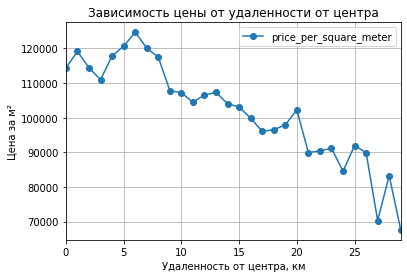

In [164]:
spb_flats_price_pivot.plot(style='o-', grid=True, title='Зависимость цены от удаленности от центра')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена за м²')

***Вывод:***
Есть два обвала на которые нам стоит обратить внимание. Первый-это примерно 3 км,но радиус 3 км слишком мал,поэтому мы отбрасываем этот вариант. Второй - 7 км. После этого,цена стремительно снижается. Значит,будем считать центром от 0 до 7 км. 

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [165]:
spb_flats_center = df.query('locality_name == "Санкт-Петербург"')
spb_flats_center['cityCenters_km'] = (spb_flats_center['cityCenters_nearest'] / 1000).round().astype('int')
spb_flats_center = spb_flats_center.query('cityCenters_km < 8.5')
spb_flats_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,day_exp,month_exp,year_exp,floor_group,living_area_ratio,kitchen_area_ratio,cityCenters_km
24,8,6500000.0,97.2,2015-10-31,2,2.7,3,46.5,1,False,...,124.0,265,66872,5,10,2015,первый,0.478395,0.201646,2
70,9,3400000.0,30.0,2018-09-05,1,2.7,5,16.0,1,False,...,503.0,14,113333,2,9,2018,первый,0.533333,0.233333,8
94,3,3500000.0,29.5,2019-04-26,1,2.5,5,15.6,2,False,...,503.0,4,118644,4,4,2019,другой,0.528814,0.186441,7
99,32,9600000.0,90.0,2017-09-26,4,2.7,5,67.0,2,False,...,503.0,104,106666,1,9,2017,другой,0.744444,0.088889,3
111,4,4590000.0,40.0,2017-05-29,1,2.7,6,18.0,1,False,...,503.0,31,114750,0,5,2017,первый,0.450000,0.250000,6


In [167]:
def draw_hist_1(col, xmin, xmax, title, xlab, ylab):
    spb_flats_center[col].hist(bins=50, range=(xmin,xmax), grid=True)
    plt.title(title, size=14)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

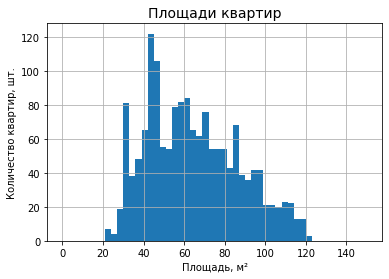

In [168]:
draw_hist_1('total_area', 0, 150, 'Площади квартир', 'Площадь, м²', 'Количество квартир, шт.')

***Вывод:*** На первый взгляд графики очень похожи,но можно сказать,что в центре Питера квартиры с большей площадью,чем по всему датасету. от 40 до 80 кв.м-наиболее часто встречающиеся значения.

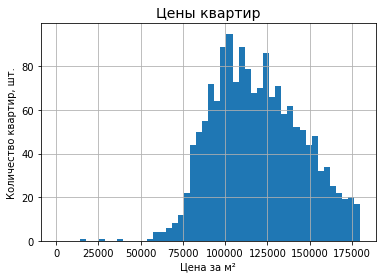

In [169]:
draw_hist_1('price_per_square_meter', 0, 180000, 'Цены квартир', 'Цена за м²', 'Количество квартир, шт.')

***Вывод:*** Цена также отличается,пиковое значение в центре Питера выше - больше 100000,когда во всем городе около 90000.

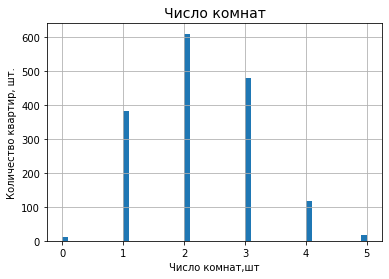

In [170]:
draw_hist_1('rooms', 0, 5, 'Число комнат', 'Число комнат,шт', 'Количество квартир, шт.')

***Вывод:*** По всему городу чаще всего встречались однокомнатные квартиры, в центре же-двухкомнатные.

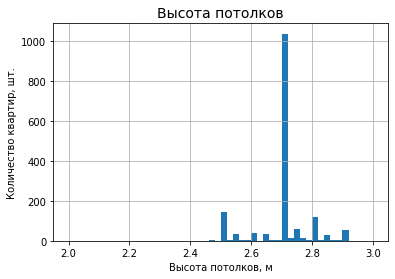

In [171]:
draw_hist_1('ceiling_height', 2, 3, 'Высота потолков', 'Высота потолков, м', 'Количество квартир, шт.')

***Вывод:*** С потолками ситуация практически не изменилась.

In [172]:
def draw_plot_spb_1(x, y, title, xlab, ylab):
    spb_flats_center.plot(x, y, kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
    plt.title(title, size=14)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

-0.3283746474227622

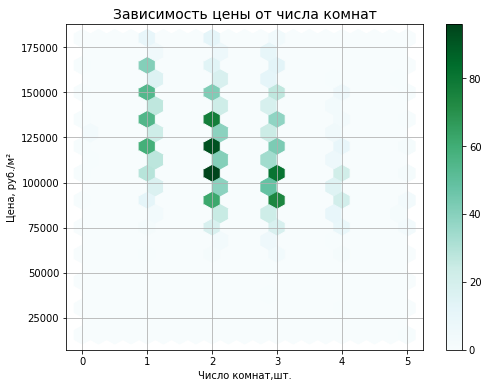

In [176]:
draw_plot_spb_1('rooms', 'price_per_square_meter','Зависимость цены от числа комнат', 'Число комнат,шт.', 'Цена, руб./м²')
spb_flats_center['rooms'].corr(spb_flats_center['price_per_square_meter'])

0.04350898789156983

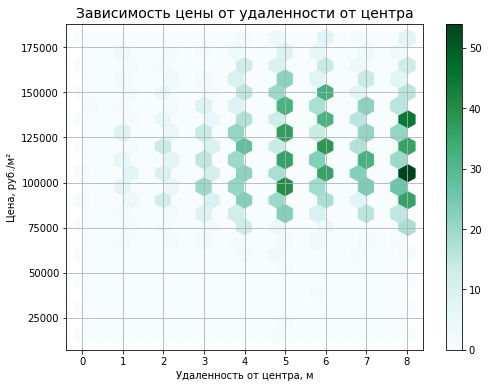

In [177]:
draw_plot_spb_1('cityCenters_km', 'price_per_square_meter', 'Зависимость цены от удаленности от центра', 'Удаленность от центра, м', 'Цена, руб./м²')
spb_flats_center['cityCenters_km'].corr(spb_flats_center['price_per_square_meter'])

(1, 250000)

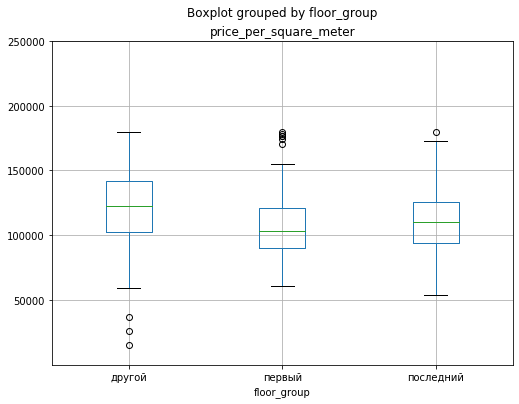

In [147]:
spb_flats_center.boxplot(column='price_per_square_meter', by='floor_group', figsize=(8,6))
plt.ylim(1, 250000)

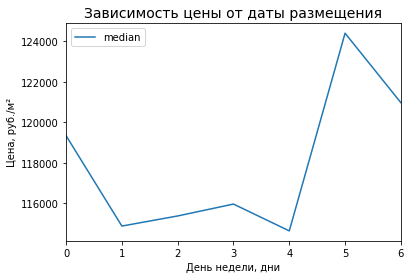

In [179]:
pivot_table_day_exp_spb = spb_flats_center.pivot_table(index='day_exp', values='price_per_square_meter', aggfunc='median')
pivot_table_day_exp_spb.columns=['median']
draw_plot1(pivot_table_day_exp_spb,'Зависимость цены от даты размещения', 'День недели, дни', 'Цена, руб./м²')

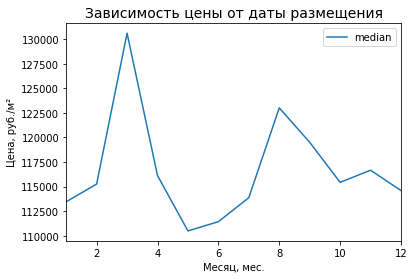

In [180]:
pivot_table_month_exp_spb = spb_flats_center.pivot_table(index='month_exp', values='price_per_square_meter', aggfunc='median')
pivot_table_month_exp_spb.columns=['median']
draw_plot1(pivot_table_month_exp_spb, 'Зависимость цены от даты размещения', 'Месяц, мес.', 'Цена, руб./м²')

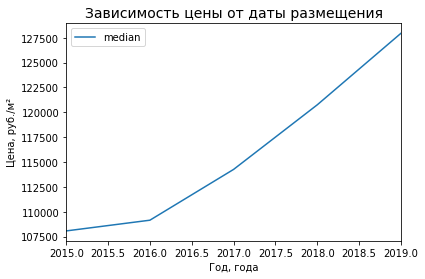

In [181]:
pivot_table_year_exp_spb = spb_flats_center.pivot_table(index='year_exp', values='price_per_square_meter', aggfunc='median')
pivot_table_year_exp_spb.columns=['median']
draw_plot1(pivot_table_year_exp_spb,'Зависимость цены от даты размещения', 'Год, года', 'Цена, руб./м²')

***Выводы:*** 
1. С комнатами ситуация практически не изменилась. Произошло смещение вверх,так как цена выше,но все также с увеличением комнат цена снижается.
2. С удаленностью от центра ситуация неоднозначная,так как на графике кажется,что с увеличением удаленности увеличивается и цена,но я думаю,что это связано с тем,что очень мало квартир в радиусе от 0 до 3 км,данных недостаточно.
3. С этажами ситуация не изменилась. 
4. С месяцами и годами ситуация аналогична, а вот дни недели наоборот-пик значений приходится на выходные, а спад на будние дни.

## Общий вывод

Мы изучили архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, что впоследствии поможет определять рыночную стоимость объектов недвижимости.

- заполнили пропущенные данные в исследуемых столбцах
- установили параметры (площадь, цена, число комнат, высота потолков и др.)
- установили связь между разными параметрами и построили графики
- избавились от редких и выбивающихся значений
- ответили на поставленные вопросы


Можно сделать выводы:
1. В среднем время продажи квартиры от 45 до 90 дней.
2. С увеличением комнат цена за квадратный метр снижается.
3. Квартиры на первых и последних этажах дешевле остальных.
4. Зависимость постановки цены от дня недели-на выходных самая низкая по всему датасету, и на выходных самая высокая- по центру Питера.
5. Выясняли сезонность на рынки недвижимости-апрель и август самые удачные месяцы для продажи.